In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import tensorflow as tf
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [ ]:
!ls "/content/drive/MyDrive/thermal images UL"

 Blast	 healthy  'leaf folder'  'Read Me - Oryza sativa - TImages.docx'
 BLB	 hispa	  'leaf spot'


In [ ]:
for dirname, _, filenames in os.walk("/content/drive/MyDrive/thermal images UL"):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        print(file_path)
        if file_path == "/content/drive/MyDrive/thermal images UL/Read Me - Oryza sativa - TImages.docx":
            continue
        #print(file_path.split('/')[5], file_path.split('/')[6])
        #categories.add(file_path.split('/')[5])
        #print(os.path.join(dirname, filename).split('/')[5])

/content/drive/MyDrive/thermal images UL/Read Me - Oryza sativa - TImages.docx
/content/drive/MyDrive/thermal images UL/healthy/thermalimage6t.jpg
/content/drive/MyDrive/thermal images UL/healthy/thermalimage8oo.jpg
/content/drive/MyDrive/thermal images UL/healthy/thermalimage8aa.jpg
/content/drive/MyDrive/thermal images UL/healthy/thermalimage6i.jpg
/content/drive/MyDrive/thermal images UL/healthy/thermalimage8t.jpg
/content/drive/MyDrive/thermal images UL/healthy/thermalimage6d.jpg
/content/drive/MyDrive/thermal images UL/healthy/thermalimage8ii.jpg
/content/drive/MyDrive/thermal images UL/healthy/thermalimage8w.jpg
/content/drive/MyDrive/thermal images UL/healthy/thermalimage3b.jpg
/content/drive/MyDrive/thermal images UL/healthy/thermalimage6q.jpg
/content/drive/MyDrive/thermal images UL/healthy/thermalimage6h.jpg
/content/drive/MyDrive/thermal images UL/healthy/thermalimage6f.jpg
/content/drive/MyDrive/thermal images UL/healthy/thermalimage8x.jpg
/content/drive/MyDrive/thermal ima

In [ ]:
cv_img = cv2.imread("/content/drive/MyDrive/thermal images UL/leaf spot/thermalimage11c.jpg")
print(cv_img.shape)

(240, 320, 3)


In [ ]:
import os
for dirname, _, filenames in os.walk('"/content/drive/MyDrive/thermal images UL"'):
    for filename in filenames:
        file_path = os.path.join(dirname, filename)
        #print(file_path)
        if file_path == "/content/drive/MyDrive/thermal images UL/Read Me - Oryza sativa - TImages.docx":
            continue
        img = cv2.imread(file_path)
        #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #img[218:, :58] = 0
        #img[:30,275:] = 0
        #img[210:,275:] = 0
        #img[:,300:] = 0
        if not os.path.isdir(file_path.split('/')[-2]):
            os.mkdir(file_path.split('/')[-2])
        cv2.imwrite("/".join(file_path.split('/')[-2:]), img)

In [ ]:

!pwd
!ls




/content
drive  sample_data  Thermalimage1a.jpg


In [ ]:
ds_train = tf.keras.utils.image_dataset_from_directory(".", seed=42, label_mode='categorical',
                                                       color_mode='rgb', batch_size=32, image_size=(224,224),
                                                       validation_split=0.2, subset="training")
ds_test = tf.keras.utils.image_dataset_from_directory(".", seed=42, label_mode='categorical',
                                                      color_mode='rgb', batch_size=32, image_size=(224,224),
                                                      validation_split=0.2, subset="validation")

Found 658 files belonging to 3 classes.
Using 527 files for training.
Found 658 files belonging to 3 classes.
Using 131 files for validation.


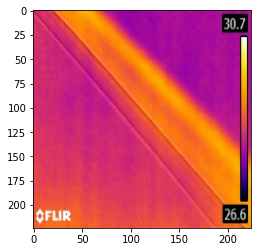

In [ ]:
pyplot.imshow(list(ds_train.as_numpy_iterator())[0][0][0]/ 255)

In [ ]:
len(ds_train), len(ds_test)

(17, 5)

In [ ]:
base_model = tf.keras.applications.resnet50.ResNet50(weights='/content/drive/MyDrive/thermal images UL/RESNET50/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',input_shape=(224, 224, 3), pooling='max', include_top = False)

In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3,))
x = base_model(inputs)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(units=200, activation="relu")(x)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(units=6, activation="softmax")(x)
model = tf.keras.Model(inputs=[inputs], outputs=[output])

In [ ]:
model.layers

In [ ]:
model.layers[1].trainable = False

In [ ]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics=["acc"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 200)               409800    
                                                                 
 dropout (Dropout)           (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 6)                 1206      
                                                                 
Total params: 23,998,718
Trainable params: 411,006
Non-traina

In [ ]:
model.fit(ds_train, validation_data=ds_test, epochs = 15)

Epoch 1/15


ValueError: ignored

In [ ]:
model.evaluate(ds_test, batch_size=32)

ValueError: ignored

In [ ]:
model.save('./model')